In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df = pd.read_csv('../data/csv/ba_beerstyles.csv')
df

,Style,Category,ABV_min,ABV_max,ABV_avg,IBU_min,IBU_max,IBU_avg,SRM_min,SRM_max,SRM_avg,Glassware,Description
0,German Bock,Bock,6.3,7.6,6.95,20,30,25.0,20,30,25.0,Tulip,Bock is a bottom fermenting lager that general...
1,German Doppelbock,Bock,6.6,7.9,7.25,17,27,22.0,12,30,21.0,Tulip,"“Doppel” meaning “double,” this style is a big..."
2,German Eisbock,Bock,7.0,14.0,10.50,25,35,30.0,12,30,21.0,Snifter,Eisbock is an extremely strong beer with a typ...
3,German Maibock,Bock,6.3,8.1,7.20,20,38,29.0,4,9,6.5,Goblet,Also called “Heller Bock” (meaning “Pale Bock”...
4,German Weizenbock,Bock,7.0,9.5,8.25,15,35,25.0,4,30,17.0,Tulip,The German-style Weizenbock is a wheat version...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Belgian Gueuze,Wild / Sour Beer,5.0,8.0,6.50,0,10,5.0,6,13,9.5,Tulip,A traditional Belgian blend of young and old L...
107,Belgian Lambic,Wild / Sour Beer,5.0,6.5,5.75,0,10,5.0,6,13,9.5,Tulip,A spontaneously fermented and unblended ale th...
108,Flanders Oud Bruin,Wild / Sour Beer,4.0,8.0,6.00,20,25,22.5,12,25,18.5,Tulip,"Oud Bruins, not restricted to, but concentrate..."
109,Flanders Red Ale,Wild / Sour Beer,4.6,6.5,5.55,10,25,17.5,12,25,18.5,Tulip,"A sour, fruity, red wine-like Belgian-style al..."


In [5]:
df.shape

(111, 13)

In [6]:
X = df[['IBU_avg', 'SRM_avg']]

y = df['ABV_avg']

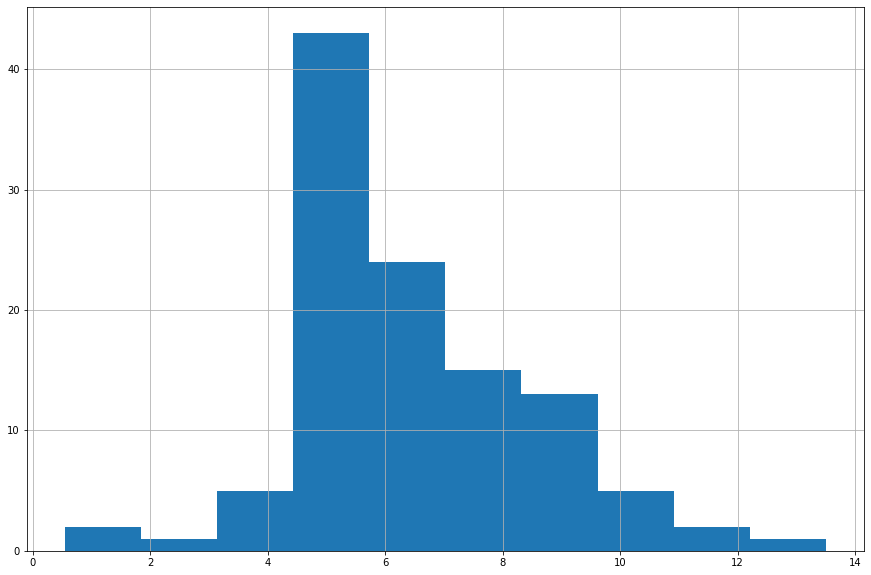

In [7]:
plt.figure(figsize=(15,10))
plt.tight_layout()
# seabornInstance.distplot(df['ABV_avg'])
df['ABV_avg'].hist()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
IBU_avg,0.071004
SRM_avg,0.002214


for every unit increase in 'IBU_avg' there is a .07% increase in 'ABV_avg'  
for every unit increase in 'SRM_avg' there is a .002% increase in 'ABV_avg'  

<b>AKA, these features have very little effect on ABV_avg. 

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
99,5.50,5.171923
10,6.00,5.740987
76,7.30,7.721272
2,10.50,6.447704
24,9.00,6.411170
102,7.50,4.295445
45,5.00,5.204104
7,4.50,6.083828
16,5.50,6.273516
90,10.00,6.415599


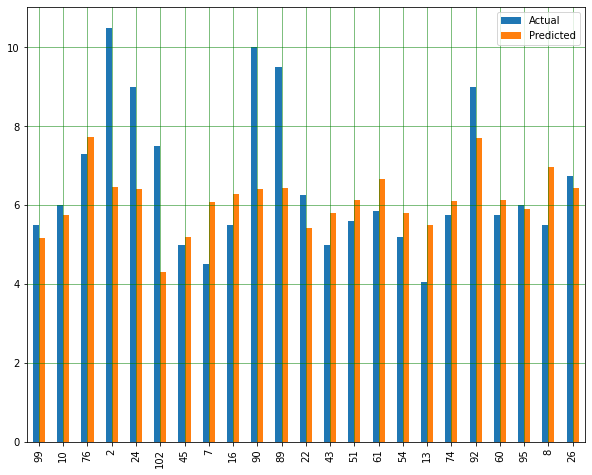

In [13]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2624888195841664
Mean Squared Error: 2.9652437707392765
Root Mean Squared Error: 1.7219883189903689
